In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd

In [2]:
with open("regression_test.json", 'r') as f:
    data = json.load(f)

In [3]:
data

{'x': [-2.0,
  -1.996,
  -1.992,
  -1.988,
  -1.984,
  -1.98,
  -1.976,
  -1.972,
  -1.968,
  -1.964,
  -1.96,
  -1.956,
  -1.952,
  -1.948,
  -1.944,
  -1.94,
  -1.936,
  -1.932,
  -1.928,
  -1.924,
  -1.92,
  -1.916,
  -1.912,
  -1.908,
  -1.904,
  -1.9,
  -1.896,
  -1.892,
  -1.888,
  -1.884,
  -1.88,
  -1.876,
  -1.8719999999999999,
  -1.8679999999999999,
  -1.8639999999999999,
  -1.8599999999999999,
  -1.8559999999999999,
  -1.852,
  -1.848,
  -1.844,
  -1.84,
  -1.836,
  -1.832,
  -1.828,
  -1.824,
  -1.82,
  -1.816,
  -1.812,
  -1.808,
  -1.804,
  -1.8,
  -1.796,
  -1.792,
  -1.788,
  -1.784,
  -1.78,
  -1.776,
  -1.772,
  -1.768,
  -1.764,
  -1.76,
  -1.756,
  -1.752,
  -1.748,
  -1.744,
  -1.74,
  -1.736,
  -1.732,
  -1.728,
  -1.724,
  -1.72,
  -1.716,
  -1.712,
  -1.708,
  -1.704,
  -1.7,
  -1.696,
  -1.692,
  -1.688,
  -1.684,
  -1.68,
  -1.676,
  -1.672,
  -1.668,
  -1.664,
  -1.66,
  -1.656,
  -1.652,
  -1.6480000000000001,
  -1.6440000000000001,
  -1.6400000000000001,
  

In [4]:
x = np.array(data["x"])

In [5]:
x

array([-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ])

In [6]:
y = np.array(data["y"])

In [7]:
y

array([0.00767725, 0.00932752, 0.01795877, ..., 0.00736406, 0.00645708,
       0.00574845])

In [8]:
display(x.shape, y.shape)

(1001,)

(1001,)

## Краевые эффекты

<IPython.core.display.Javascript object>


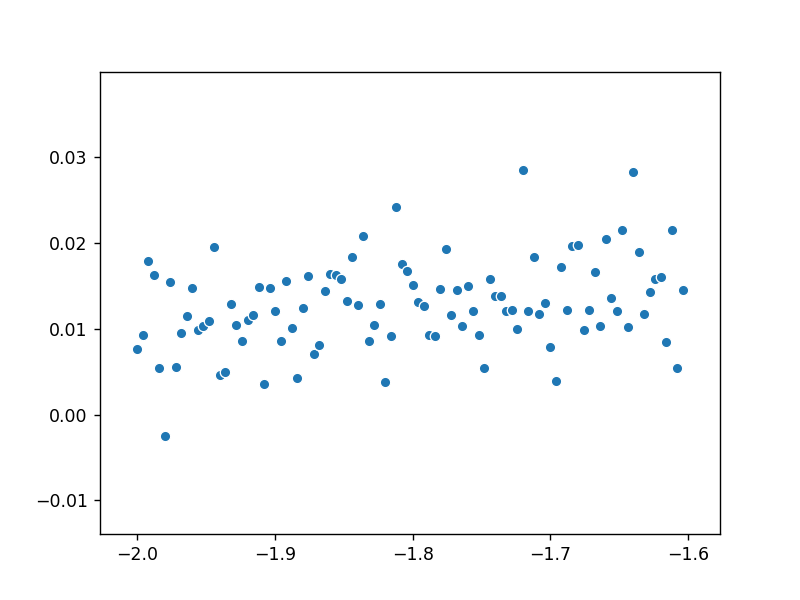

In [9]:
display(sns.scatterplot(x[:100], y[:100]))

<IPython.core.display.Javascript object>


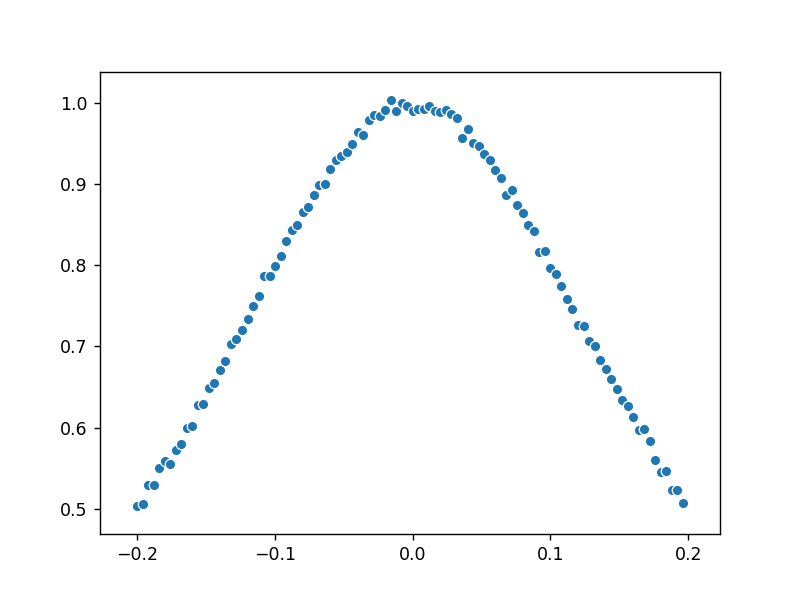

In [10]:
sns.scatterplot(x[450:550], y[450:550])

In [12]:
from sklearn.svm import SVR

In [13]:
from sklearn.kernel_ridge import KernelRidge

In [14]:
#rbf, laplacian, polynomial, exponential, chi2 and sigmoid

In [15]:
x_test = x.reshape(x.shape[0], 1)
y_test = y.reshape(y.shape[0], 1)

In [16]:
clf_rbf = KernelRidge(alpha=1, kernel='rbf')
clf_lapl = KernelRidge(alpha=1, kernel='laplacian')
clf_poly = KernelRidge(alpha=1, kernel='poly', degree=16)
clf_chi2 = KernelRidge(alpha=1, kernel='chi2')
clf_sig = KernelRidge(alpha=1, kernel='sigmoid')

In [17]:
clf_rbf.fit(x_test, y_test)
clf_lapl.fit(x_test, y_test)
clf_poly.fit(x_test, y_test)
#clf_chi2.fit(x_test, y_test)
clf_sig.fit(x_test, y_test)

C:\Users\mdere\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='sigmoid',
            kernel_params=None)

In [18]:
display(clf_rbf.get_params(deep=True),
clf_lapl.get_params(deep=True),
clf_poly.get_params(deep=True),
clf_sig.get_params(deep=True))

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'rbf',
 'kernel_params': None}

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'laplacian',
 'kernel_params': None}

{'alpha': 1,
 'coef0': 1,
 'degree': 16,
 'gamma': None,
 'kernel': 'poly',
 'kernel_params': None}

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'sigmoid',
 'kernel_params': None}

In [19]:
y_rbf = clf_rbf.predict(x_test).reshape(1001)
y_lapl = clf_lapl.predict(x_test).reshape(1001)
y_poly = clf_poly.predict(x_test).reshape(1001)
y_sig = clf_sig.predict(x_test).reshape(1001)

### Лаплассиан

<IPython.core.display.Javascript object>


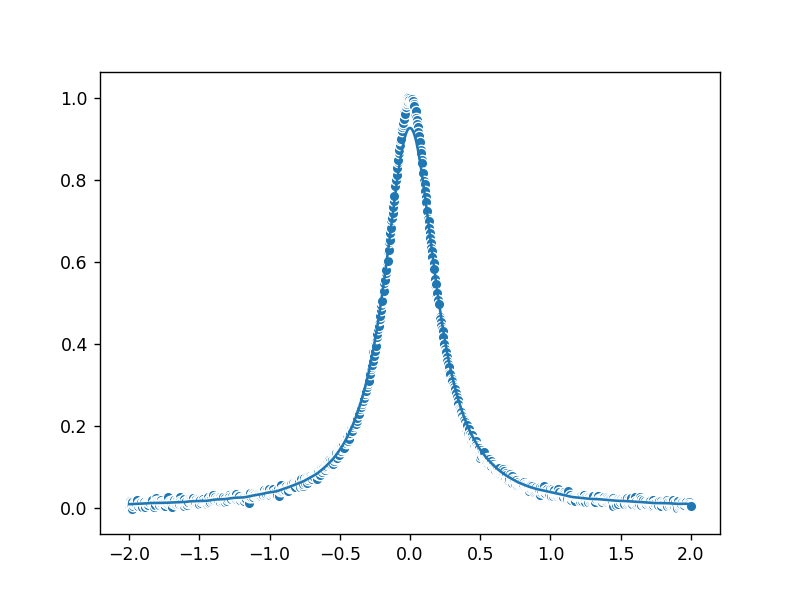

In [20]:
display(sns.scatterplot(x, y), 
        sns.lineplot(x, y_lapl))

### RBF

<IPython.core.display.Javascript object>


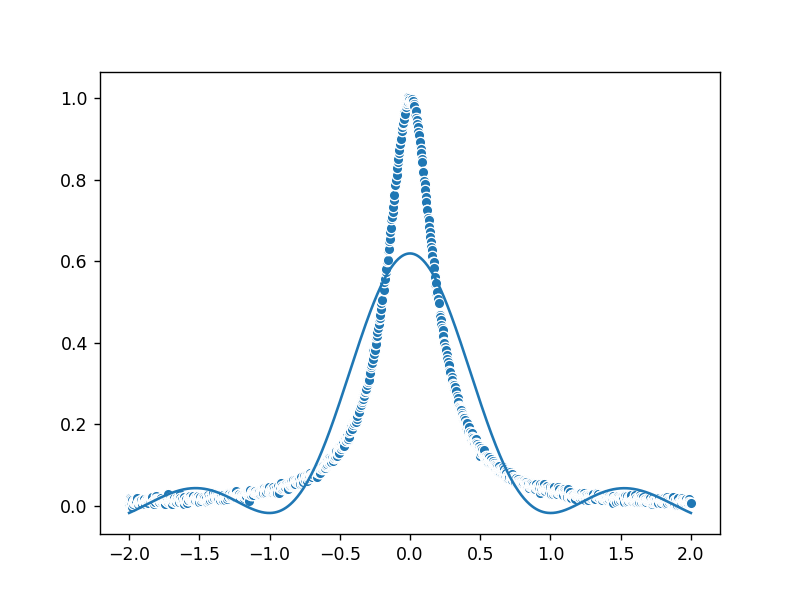

In [21]:
display(sns.scatterplot(x, y), 
        sns.lineplot(x, y_rbf))

### Sigm

<IPython.core.display.Javascript object>


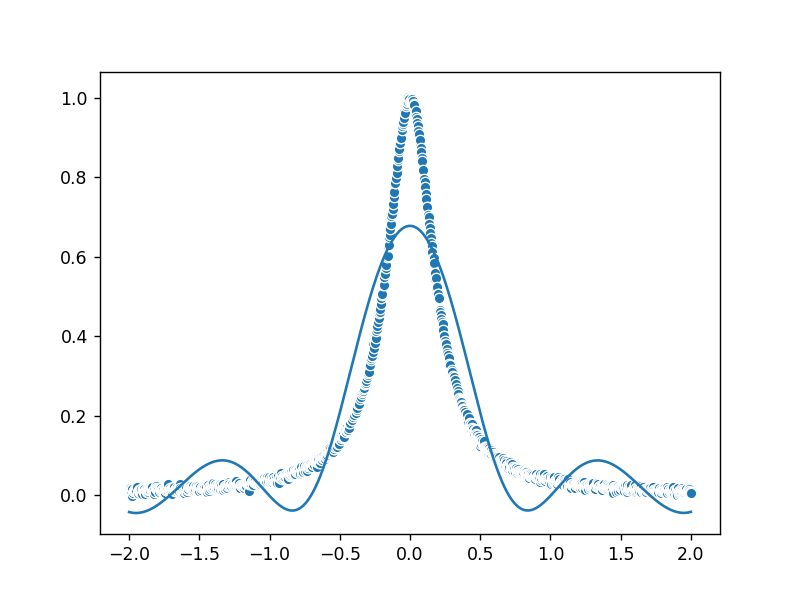

In [22]:
display(sns.scatterplot(x, y), 
        sns.lineplot(x, y_sig))

### Poly

<IPython.core.display.Javascript object>


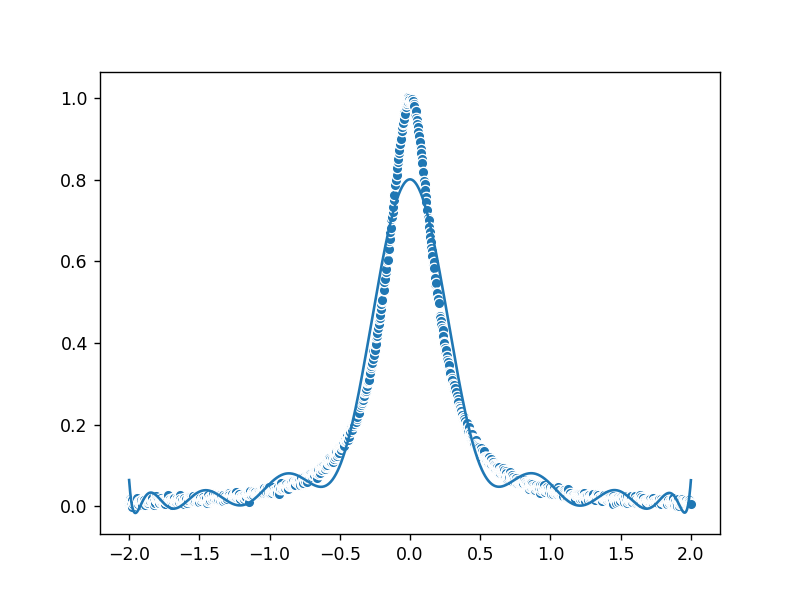

In [23]:
display(sns.scatterplot(x, y), 
        sns.lineplot(x, y_poly))

In [24]:
import math

In [25]:
def f(x):
    return 1 / (1 + 25 * x * x)

In [26]:
x_1 = np.linspace(-2, 2, 1001)
y_1 = np.array(list(map(f, x_1)))

<IPython.core.display.Javascript object>


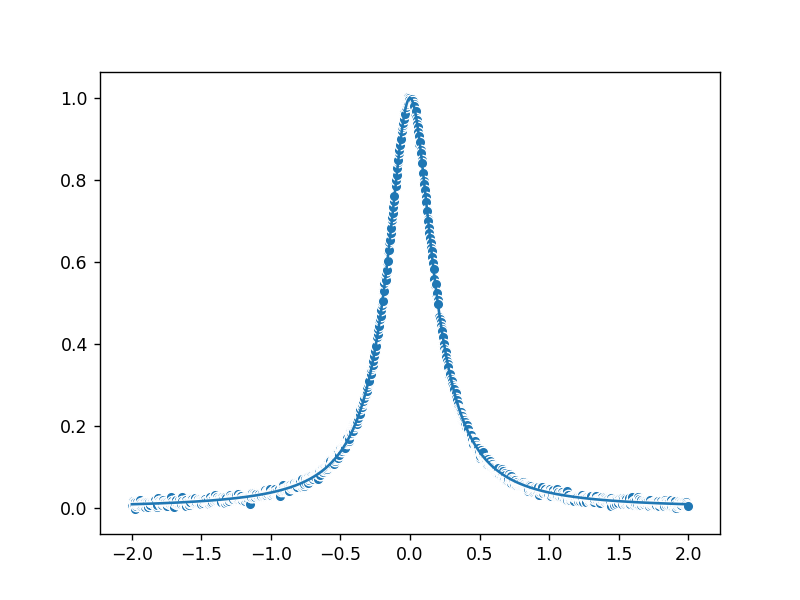

In [27]:
display(sns.lineplot(x_1, y_1), sns.scatterplot(x, y))

In [28]:
from sklearn import svm

In [29]:
clf_svm = svm.SVR()

In [32]:
clf_svm.fit(x_test, y_test)

C:\Users\mdere\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mdere\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_svm = clf_svm.predict(x_test) #можем взять svm с полиномиальным и дигри = 16 ?

<IPython.core.display.Javascript object>


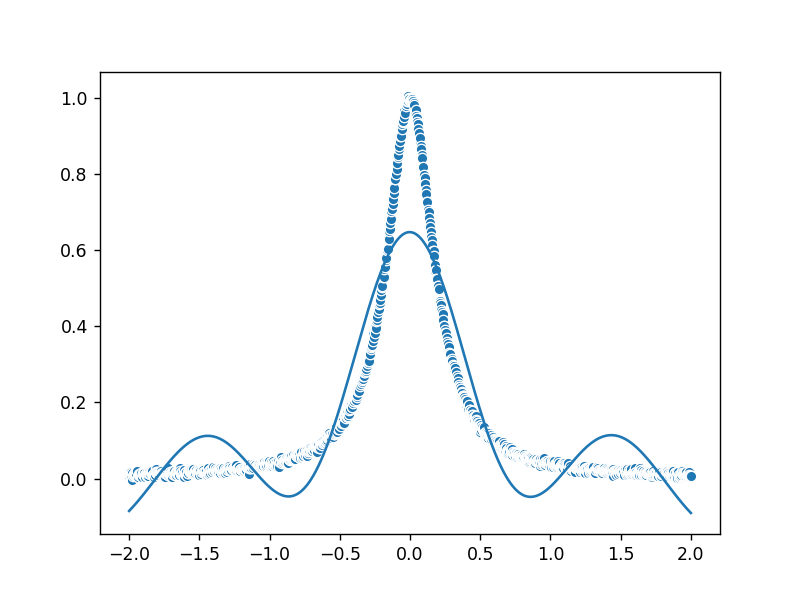

In [34]:
display(sns.scatterplot(x, y), 
        sns.lineplot(x, y_svm))

In [43]:
clf_svm_poly = svm.SVR(kernel='poly', degree=8) 
clf_svm_poly.fit(x_test, y_test)

C:\Users\mdere\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mdere\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=8, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_svm_poly = clf_svm_poly.predict(x_test)

<IPython.core.display.Javascript object>


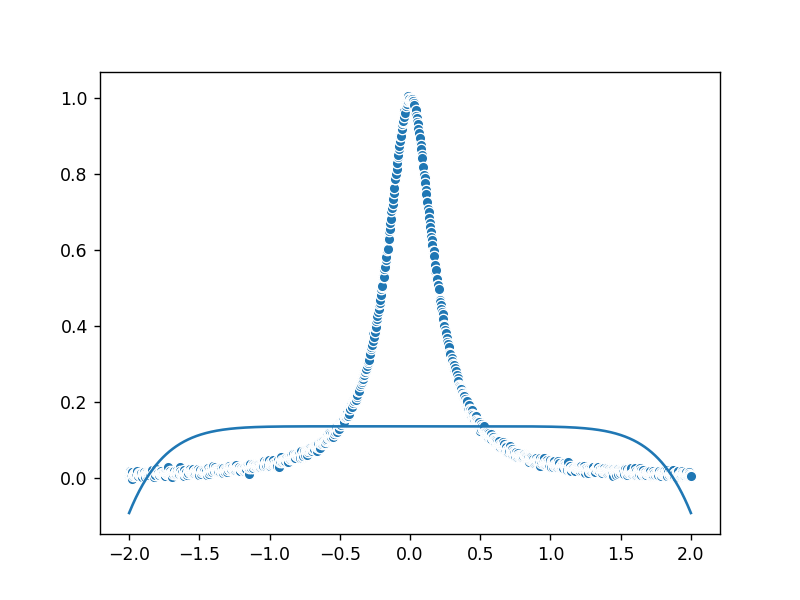

In [45]:
display(sns.scatterplot(x, y), 
        sns.lineplot(x, y_svm_poly))